# Functional example for LUME-Impact

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
# Nicer plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (8,4)

In [3]:
from impact import Impact, run_impact_with_distgen, evaluate_impact_with_distgen

import os

In [4]:
gfile = 'templates/lcls_injector/distgen.yaml'
ifile = 'templates/lcls_injector/ImpactT.yaml'

# Functional run_impact_with_distgen

This is a functional way to apply some settings to and run distgen and impact together.

Any key with a prefix `distgen:` will send its suffix to distgen's Generator.

Otherwise, any key that can be set with Impact's attr syntax can be used.



Setting distgen n_particle = 100
Setting impact total_charge = 0
Setting impact stop = 0.02
Removed element: stop_1
Set stop to s = 0.02
Setting impact GUN_phase:autophase_deg = 0
Distribution format: None
Output file: None

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 250 pC.
   Number of macroparticles: 100.
   Assuming cylindrical symmetry...
   r distribution: radial Gaussian
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Tukey
      length = 6.6 ps, ratio = 0.8
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 459.950 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 459.950 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 459.950 eV/c
   Shifting avg_x = -0.0017829 mm -> 0 mm
   Scaling sigma_x = 0.250234 mm -> 0.250725 mm
   Shifting avg_y = -0.000295389 mm -> 0 mm
   Scaling sigma_y = 0.250364 mm -> 0.250725 mm
   Shifting avg_px = -9.558

<Impact with 100 particles, stopping at 0.02 m, at 0x108f50160>

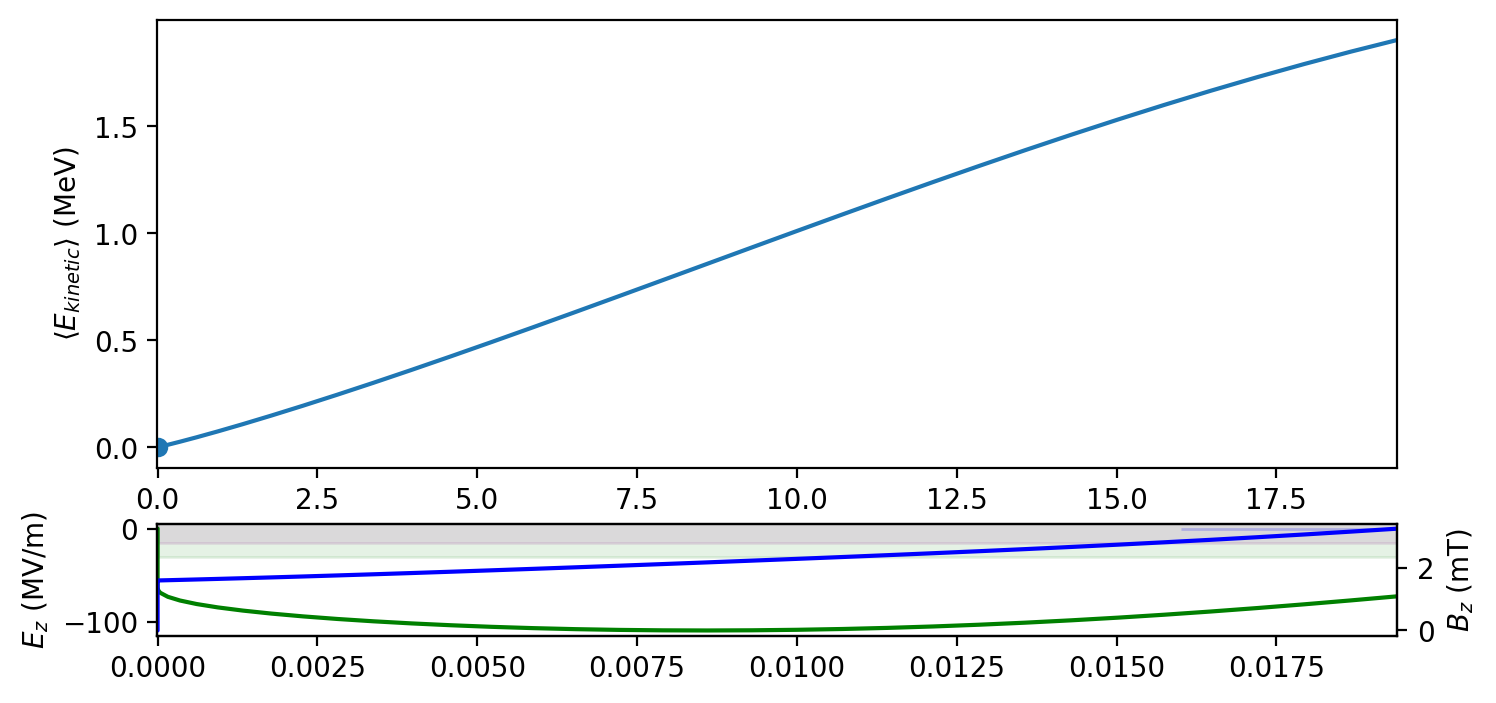

In [5]:
# Make some settings
SETTINGS0 = {
    'distgen:n_particle':100,
    'total_charge':0,  # effectively turns spacecharge off
    'stop':0.02, 
    'total_charge': 0,
    'GUN_phase:autophase_deg':0}


# This returns an Impact object that has run
I = run_impact_with_distgen(
    settings=SETTINGS0,
    distgen_input_file=gfile,
    impact_config=ifile,
    verbose=True
)

I.plot('mean_kinetic_energy')
I

In [6]:
h5 = I.archive()

Archiving to file impact_c8cf7ef9b0bbe125de0b5d63850eccdd.h5


In [7]:
import h5py
h5 = h5py.File('impact_c8cf7ef9b0bbe125de0b5d63850eccdd.h5', 'r')
list(h5)

['control_groups', 'initial_particles', 'input', 'output']

In [8]:
I.from_archive('impact_c8cf7ef9b0bbe125de0b5d63850eccdd.h5')
I.output.keys()

dict_keys(['autophase_info', 'run_info', 'stats', 'slice_info', 'particles'])

In [9]:
I['total_charge'] = 1
I.write_input()
!cat {I.path}/ImpactT.in

writing 100 particles to /var/folders/2f/l5_mybzs30j4qqvyj98w1_nw0000gn/T/tmpouuyon7b/partcl.data
Cathode start with cathode_kinetic_energy_ref = 1.0 eV
Cathode start: Replaced Np with 100 according to initial particles
Cathode start: Replaced Bkenergy with 1.0 according to initial particles
Cathode start: Replaced Temission with 5.326350576132463e-12 according to initial particles
Cathode start: Replaced Tini with -2.738554468039765e-12 according to initial particles
Setting total charge to 0.9999999999999999 C
! Impact-T input file
!Npcol Nprow
1 1
!Dt Ntstep Nbunch
5e-13 1000000 1
!Dim Np Flagmap Flagerr Flagdiag Flagimg Zimage
6 100 1 0 2 1 0.02
!Nx Ny Nz Flagbc Xrad Yrad Perdlen
32 32 32 1 0.015 0.015 45.0
!Flagdist Rstartflg Flagsbstp Nemission Temission
16 0 0 400 5.326350576132463e-12
!sigx(m) sigpx muxpx xscale pxscale xmu1(m) xmu2
0.0006 0.0 0.0 1.0 1.0 0.0 0.0
!sigy(m) sigpy muxpy yscale pyscale ymu1(m) ymu2
0.0006 0.0 0.0 1.0 1.0 0.0 0.0
!sigz(m) sigpz muxpz zscale pzscale 

# Functional evaluate_impact_with_distgen

Similar to above, but reuruns a dict of common outputs, and an optinal archive file.

This is useful in optimizations and creating datasets.

In [10]:

# This returns an Impact object that has run
O1 = evaluate_impact_with_distgen(
    SETTINGS0,
    distgen_input_file=gfile,
    impact_config=ifile,
    archive_path = '.'
)

# This is the default output
O1

Setting GUN_phase relative phase = 0 deg


{'error': False,
 'end_t': 8.2587796e-11,
 'end_mean_z': 0.019394996,
 'end_moment4_x': 0.00027210158,
 'end_moment4_y': 0.00027072853,
 'end_moment4_z': 0.00035338747,
 'end_mean_y': -1.0694885e-08,
 'end_sigma_y': 0.00022232416,
 'end_norm_emit_y': 2.2707187e-07,
 'end_mean_x': -7.3036542e-08,
 'end_sigma_x': 0.00022254175,
 'end_norm_emit_x': 2.2733475e-07,
 'end_sigma_z': 0.00028894632,
 'end_norm_emit_z': 2.5412705e-07,
 'end_loadbalance_min_n_particle': 100.0,
 'end_loadbalance_max_n_particle': 100.0,
 'end_n_particle': 100.0,
 'end_moment3_x': 3.4437469e-05,
 'end_moment3_y': 4.4364276e-05,
 'end_moment3_z': 0.00032441007,
 'end_mean_gamma': 4.7245665,
 'end_mean_beta': 0.97734344,
 'end_max_r': 0.00048150187,
 'end_sigma_gamma': 0.030050216,
 'end_max_amplitude_x': 0.0004700399,
 'end_max_amplitude_y': 0.00045379459,
 'end_max_amplitude_z': 0.00070089752,
 'end_moment4_px': 2098.43067854728,
 'end_moment4_py': 2068.6236498947246,
 'end_moment4_pz': 19286.59606692665,
 'end_mean

In [11]:
I2 = Impact.from_archive(O1['archive'])

In [12]:
I2.fingerprint() == I.fingerprint()

False

A custom merit function can be provided to give different output. Note that the fingerprint is always returned.

In [13]:
# Custom merit function
def my_merit(impact_object):
    """
    Custom merit function.
    
    Returns the maximum sigma_x seen
    
    """
    d = {'max_sigma_x': I.stat('sigma_x').max()}
    
    return d


evaluate_impact_with_distgen(
    SETTINGS0,
    distgen_input_file=gfile,
    impact_config=ifile,
    merit_f = my_merit
)

Setting GUN_phase relative phase = 0 deg


{'max_sigma_x': 0.00025965193,
 'fingerprint': '6f259cc13a90b129c8c59e01665a8026'}

In [14]:
# Cleanup
os.remove(O1['archive'])